# Session 2: Intro to Pandas

## Pandas DataFrames
Pandas, a library written by Wes McKinney, is a great tool for data manipulation and analysis. It provides two classes:
* a Series object, which handles a single column of data;
* a DataFrame object, which handles multiple columns (like an Excel spreadsheet).

You can build your own DataFrames or read in from other sources like CSVs or JSON. Pandas handles missing data beautifully; lets you sort, operate on and and merge datasets; provides plotting capabilities; and handles time series data (among other advantages).

### Example 1. Welsh pubs

#### (a) Creating Series and DataFrames

In [5]:
import pandas as pd
import pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
# Create a series by passing a list

towns = pd.Series(['Cardiff', 'Swansea', 'Abergavenny','Machynlleth'])
towns

0        Cardiff
1        Swansea
2    Abergavenny
3    Machynlleth
dtype: object

In [7]:
towns = ['Cardiff', 'Swansea', 'Abergavenny','Machynlleth']
populations = [335145, 230300, 12515, 2235]
number_of_pubs = [2100, 1680, 198, 48]

In [8]:
# Create an empty DataFrame, and add new columns to it

towns_df = pd.DataFrame()
towns_df['name'] = towns

In [9]:
towns_df['population'] = populations
towns_df['n_pubs'] = number_of_pubs

In [10]:
towns_df

,name,population,n_pubs
0,Cardiff,335145,2100
1,Swansea,230300,1680
2,Abergavenny,12515,198
3,Machynlleth,2235,48


#### (b) View and select data

In [11]:
# the .head() method shows the top rows

towns_df.head(2)

,name,population,n_pubs
0,Cardiff,335145,2100
1,Swansea,230300,1680


In [12]:
# check how many rows and columns
towns_df.shape

(4, 3)

In [13]:
# Inspect only one series using square bracket notation

towns_df['population']

0    335145
1    230300
2     12515
3      2235
Name: population, dtype: int64

In [14]:
# Or dot notation

towns_df.population

0    335145
1    230300
2     12515
3      2235
Name: population, dtype: int64

#### (c) Operate on columns

In [15]:
# Create a new column with math outputs

towns_df['people_per_pub'] = towns_df.population / towns_df.n_pubs

towns_df

,name,population,n_pubs,people_per_pub
0,Cardiff,335145,2100,159.592857
1,Swansea,230300,1680,137.083333
2,Abergavenny,12515,198,63.207071
3,Machynlleth,2235,48,46.562500


In [16]:
# Use a single column's value to select data

towns_df.loc[towns_df.people_per_pub < 150]

,name,population,n_pubs,people_per_pub
1,Swansea,230300,1680,137.083333
2,Abergavenny,12515,198,63.207071
3,Machynlleth,2235,48,46.562500


In [17]:
# Use the .sort_values() method

towns_df.sort_values(by = 'people_per_pub')

,name,population,n_pubs,people_per_pub
3,Machynlleth,2235,48,46.562500
2,Abergavenny,12515,198,63.207071
1,Swansea,230300,1680,137.083333
0,Cardiff,335145,2100,159.592857


#### (d) Plot outputs

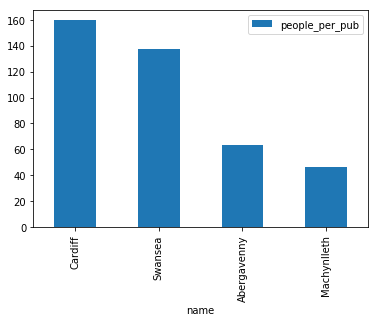

In [19]:
# Plot charts using the .plot() method 

towns_df.plot(x = 'name', y = 'people_per_pub', kind = 'bar')

### Example 2: Bangladesh firm census

This dataset describes characteristics of firms in Dhaka, Bangladesh. 

In [20]:
path = r'https://raw.githubusercontent.com/worldbank/Python-for-Data-Science/master/Spring%202019%208-week%20course/week%204/SampleData/Exercise%201/firms_Dhaka.csv'

In [28]:
df = pd.read_csv(path, encoding = 'utf_8')

In [29]:
# inspect first two rows

df.head(2)

,Unnamed: 0,Geographic,Sector,Size_Frame,Size_Inter,Weights,age,export,exporter,family_own,...,sales_per_,sector_1,share_fore,share_sold,share_wome,size_,wt,years,rank,ID
0,0,Dhaka,Leather and Lather goods,0-9,0-9,1.75,20+years,0,Non-exporter,1,...,2155263.3,leather,0,0,0,Micro,1.42,50,10,0
1,1,Dhaka,Leather and Lather goods,0-9,0-9,1.75,6-10years,0,Non-exporter,1,...,3123123.0,leather,0,0,0,Micro,1.42,10,10,1


In [30]:
# print a list of the columns

df.columns

Index(['Unnamed: 0', 'Geographic', 'Sector', 'Size_Frame', 'Size_Inter',
       'Weights', 'age', 'export', 'exporter', 'family_own', 'female_own',
       'foreign_ow', 'geometry', 'gpsAccurac', 'gpsAltitud', 'Lat', 'Lon',
       'innovative', 'leader', 'limited_li', 'node', 'number_cli',
       'partnershi', 'product_re', 'product_ye', 'public_', 'region',
       'sales_ex_1', 'sales_expo', 'sales_per_', 'sector_1', 'share_fore',
       'share_sold', 'share_wome', 'size_', 'wt', 'years', 'rank', 'ID'],
      dtype='object')

In [31]:
# check the shape

df.shape

(1438, 39)

In [32]:
# a DataFrame is equivalent to several Series glued together. Use square bracket notation, or dot notation, to inspect one Series (ie. a column).

df.years[:5]

0    50
1    10
2    41
3    40
4    38
Name: years, dtype: int64

In [33]:
# summarize this column 

df.years.mean()

14.68219749652295

In [34]:
df.years.describe()

count    1438.000000
mean       14.682197
std        12.125066
min         1.000000
25%         5.000000
50%        10.000000
75%        20.000000
max        80.000000
Name: years, dtype: float64

In [35]:
# check the unique values in a column (good for categorical data)

df.age.unique()

array(['20+years', '6-10years', '16-20years', '11-15years', '0-5years'],
      dtype=object)

In [101]:
# get a count of each unique value

df.age.value_counts()

0-5years      397
20+years      342
6-10years     329
11-15years    189
16-20years    181
Name: age, dtype: int64

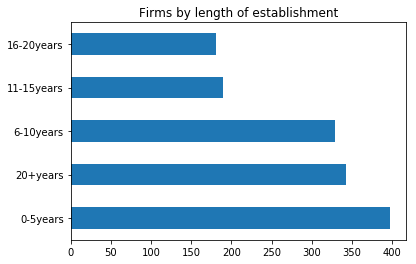

In [38]:
df.age.value_counts().plot(kind = 'barh', title = 'Firms by length of establishment')

Let's explore growth trends for new firms. Which industries are the new firms concentrated in? (Take domestic firms only.)

In [43]:
df[['Sector','years']].groupby(['Sector']).mean()

,years
Sector,
Footwear,9.996109
Leather and Lather goods,19.934959
Light Engineering,13.210526
Plastic Product,12.210383


In [108]:
# select values where a conditional statement is true (Boolean indexing - Nick's favorite)

df[df.years < 5][:5]

,Unnamed: 0,Geographic,Sector,Size_Frame,Size_Inter,Weights,age,export,exporter,family_own,...,sales_per_,sector_1,share_fore,share_sold,share_wome,size_,wt,years,rank,ID
11,11,Dhaka,Leather and Lather goods,0-9,0-9,1.750000,0-5years,0,Non-exporter,1,...,1500000.00,leather,0,0,0,Micro,1.893333,3,10,11
18,18,Dhaka,Leather and Lather goods,0-9,0-9,1.611940,0-5years,70,Exporter,1,...,1911179.30,leather,0,20,0,Micro,1.307036,3,10,18
23,23,Dhaka,Footwear,0-9,0-9,1.659574,0-5years,0,Non-exporter,1,...,423703.72,footwear,0,0,0,Micro,1.364271,2,10,23
27,27,Dhaka,Footwear,0-9,0-9,1.281690,0-5years,0,Non-exporter,1,...,2500000.00,footwear,0,0,0,Micro,1.556338,2,10,27
31,31,Dhaka,Leather and Lather goods,0-9,0-9,1.611940,0-5years,100,Exporter,0,...,1848275.90,leather,0,20,0,Small,1.307036,4,5,31
